#Flower Classifier

## Get Data

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                      title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                           Apple Quality                               170KB  2024-01-11 14:31:07           3671         92  1.0              
hummaamqaasim/jobs-in-data                               Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32          10000        197  1.0              
fekihmea/sales-store-overview                            Sales Store overview                          2KB  2024-01-20 11:10:10            897         25  1.0              
shashwatwork/depression-and-mental-health-data-analysis  Depression and Men

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

with zipfile.ZipFile('flowers-recognition.zip') as zip_ref:
    zip_ref.extractall()

## Train Model

In [ ]:
from fastai.vision.all import *

In [ ]:
path = "flowers/"
files = get_image_files(path)
len(files)

4317

In [ ]:
files[0]

Path('flowers/sunflower/7176723954_e41618edc1_n.jpg')

In [ ]:
pat = r'flowers/(.*)/.*'

In [ ]:
# https://docs.fast.ai/vision.data.html#imagedataloaders.from_path_re
dls = ImageDataLoaders.from_path_re(path, files, pat, item_tfms=Resize(224),
                                    batch_tfms=aug_transforms(size=224))

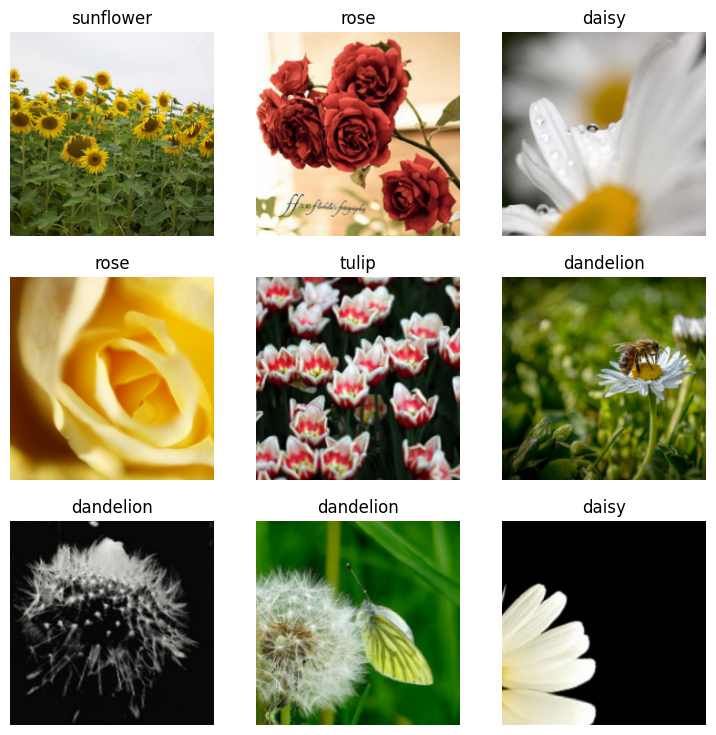

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 56.6MB/s]


SuggestedLRs(valley=0.0010000000474974513)

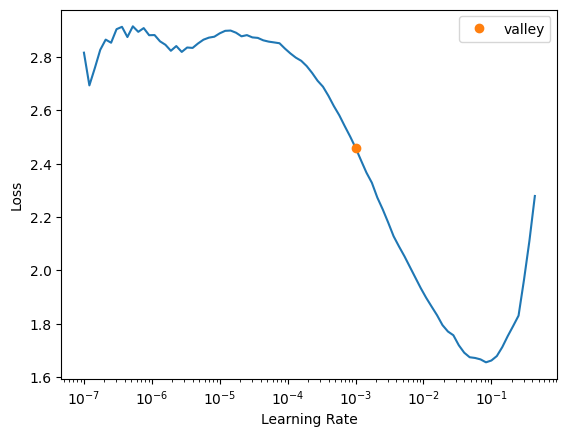

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.278775,0.416501,0.152955,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.504594,0.304777,0.110081,00:39
1,0.351912,0.278891,0.099652,00:45


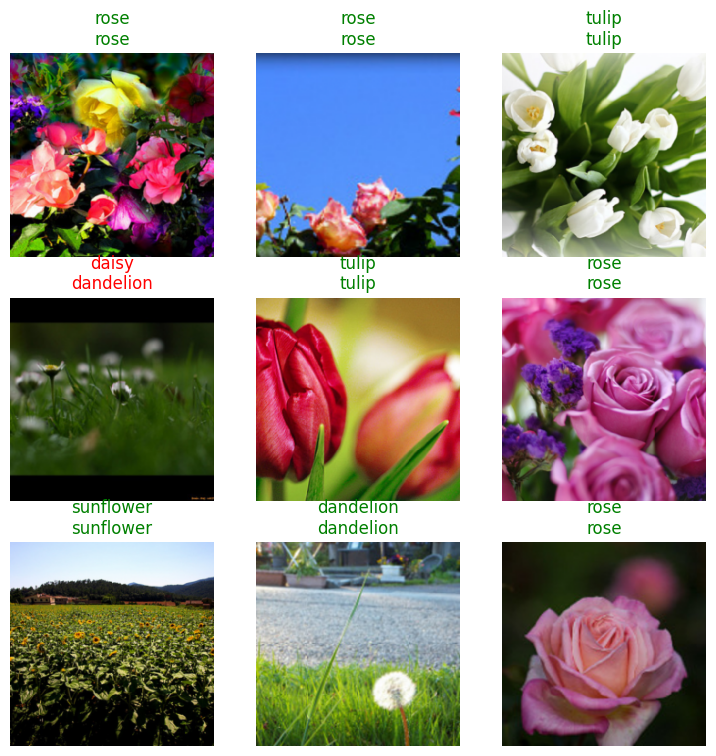

In [ ]:
learn.show_results()

## Validate Model

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

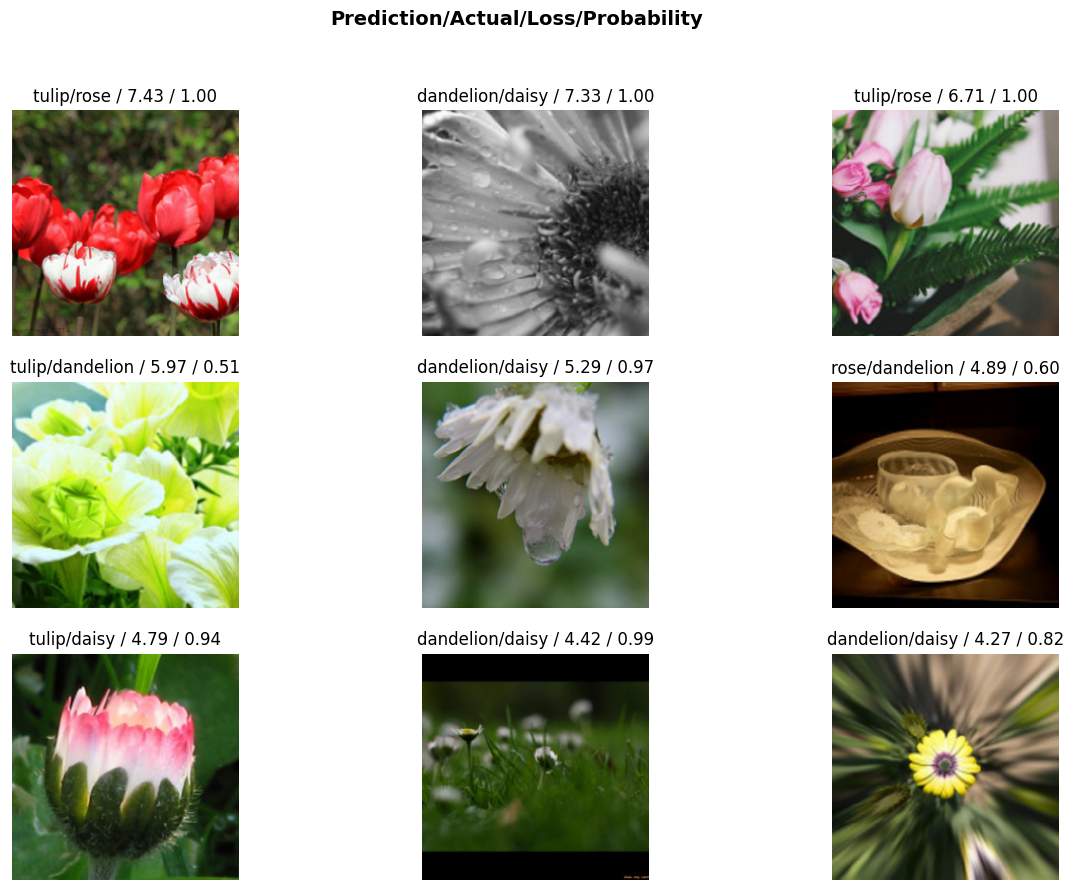

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

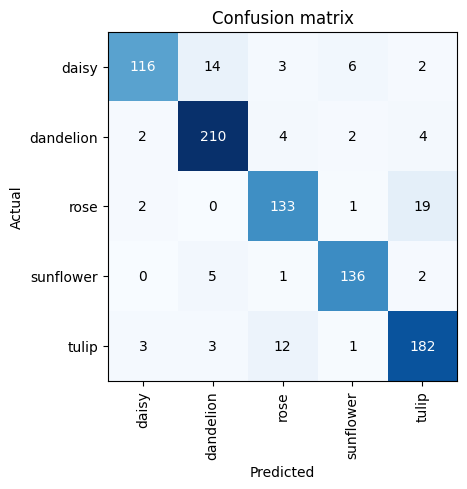

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.save("/content/flowers_classifier", with_opt=True, pickle_protocol=2)

Path('/content/flowers_classifier.pth')

## Make Predictions

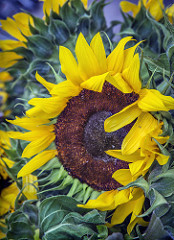

In [ ]:
from PIL import Image
path = files[5]
im = Image.open(path)
im

In [ ]:
from fastai.vision.all import *
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.load("/content/flowers_classifier")
learn

In [ ]:
learn.predict(path)

('sunflower',
 tensor(3),
 tensor([6.7844e-05, 6.8647e-03, 6.0985e-03, 9.7802e-01, 8.9518e-03]))

In [ ]:
learn.predict(path)[0]

'sunflower'